In [1]:
import wget
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy
import os

In [2]:
file = 'insurance.csv'
if os.path.isfile(file):
    print('file exists')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv', file)

file exists


In [3]:
df = pd.read_csv(file)

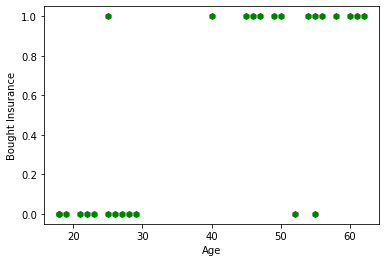

In [4]:
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.scatter(df['age'], df['bought_insurance'], marker = 'h', color = 'green')

In [5]:
from sklearn import linear_model

In [6]:
X = df[['age']]
y = df['bought_insurance']

In [7]:
logreg = linear_model.LogisticRegression()

In [8]:
logreg.fit(X, y)

LogisticRegression()

In [9]:
df['predict'] = pd.Series(logreg.predict(X))

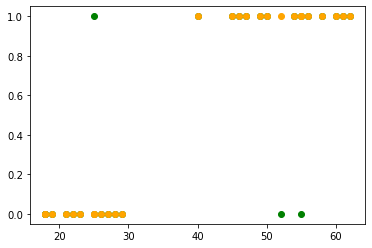

In [10]:
plt.scatter(X, y, color='green')
plt.scatter(X, df['predict'], color='orange')

In [11]:
logreg.score(X, y)

0.8888888888888888

In [12]:
print(os.__file__)

/Users/saleheen/opt/anaconda3/lib/python3.7/os.py


In [13]:
logreg.predict_proba(X)

array([[0.90742181, 0.09257819],
       [0.86716909, 0.13283091],
       [0.24897506, 0.75102494],
       [0.14412861, 0.85587139],
       [0.27515554, 0.72484446],
       [0.08921347, 0.91078653],
       [0.10085042, 0.89914958],
       [0.05390402, 0.94609598],
       [0.04164368, 0.95835632],
       [0.04739857, 0.95260143],
       [0.94398106, 0.05601894],
       [0.81302094, 0.18697906],
       [0.8327475 , 0.1672525 ],
       [0.79155013, 0.20844987],
       [0.20181043, 0.79818957],
       [0.10085042, 0.89914958],
       [0.86716909, 0.13283091],
       [0.06951213, 0.93048787],
       [0.93637149, 0.06362851],
       [0.94398106, 0.05601894],
       [0.91819109, 0.08180891],
       [0.85077487, 0.14922513],
       [0.4611219 , 0.5388781 ],
       [0.30297839, 0.69702161],
       [0.18086723, 0.81913277],
       [0.11381561, 0.88618439],
       [0.89539637, 0.10460363]])

In [14]:
logreg.predict([[24]])

array([0])

#### Exercise

In [15]:
file = 'employee_satisfaction.csv'
if os.path.isfile(file):
    print('file exists')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv', file)

file exists


In [16]:
df = pd.read_csv(file)

In [17]:
df.columns = df.columns.str.lower()

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [20]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


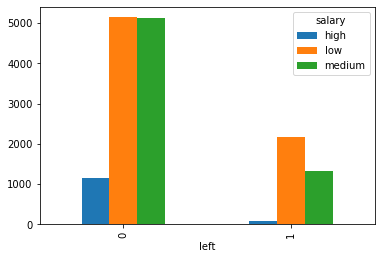

In [21]:
pd.crosstab(df['left'],df['salary']).plot(kind='bar')

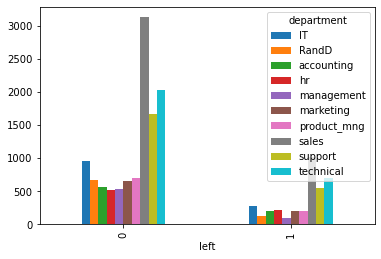

In [22]:
pd.crosstab(df['left'], df['department']).plot(kind='bar')

In [23]:
bydept = pd.crosstab(df['left'], df['department'])

In [24]:
bysalary = pd.crosstab(df['left'], df['salary'])

In [25]:
bydept.loc['retention'] = bydept.loc[0]/(bydept.loc[0] + bydept.loc[1])

In [26]:
bydept

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,954.000000,666.000000,563.000000,524.000000,539.000000,655.000000,704.000000,3126.000000,1674.000000,2023.00000
1,273.000000,121.000000,204.000000,215.000000,91.000000,203.000000,198.000000,1014.000000,555.000000,697.00000
retention,0.777506,0.846252,0.734029,0.709066,0.855556,0.763403,0.780488,0.755072,0.751009,0.74375


In [27]:
bysalary.loc['retention'] = bysalary.loc[0]/(bysalary.loc[0] + bysalary.loc[1])

In [28]:
bysalary

salary,high,low,medium
left,,,
0,1155.000000,5144.000000,5129.000000
1,82.000000,2172.000000,1317.000000
retention,0.933711,0.703116,0.795687


In [29]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [30]:
df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]

In [31]:
dummies = pd.get_dummies(df['salary'])

In [32]:
df = pd.concat((df, dummies),axis=1)

In [33]:
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,high,low,medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0


In [34]:
df['left'] = df.pop('left')

In [35]:
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium,left
0,0.38,157,0,low,0,1,0,1
1,0.80,262,0,medium,0,0,1,1
2,0.11,272,0,medium,0,0,1,1
3,0.72,223,0,low,0,1,0,1
4,0.37,159,0,low,0,1,0,1


In [36]:
df = df.drop(columns=['medium','salary'])

In [37]:
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,left
0,0.38,157,0,0,1,1
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,1
4,0.37,159,0,0,1,1


In [38]:
logreg = linear_model.LogisticRegression(max_iter=1000)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = df.drop(columns=['left'])
y = df['left']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
y_pred = pd.Series(logreg.predict(X_test))

In [43]:
logreg.score(X_test, y_test)

0.762

In [44]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5776776959724963

In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2294
           1       0.49      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.58      3000
weighted avg       0.72      0.76      0.73      3000



In [46]:
y_test.value_counts()

0    2294
1     706
Name: left, dtype: int64

In [47]:
y_pred.value_counts()

0    2668
1     332
dtype: int64

In [48]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [49]:
cf_matrix

array([[2124,  170],
       [ 544,  162]])

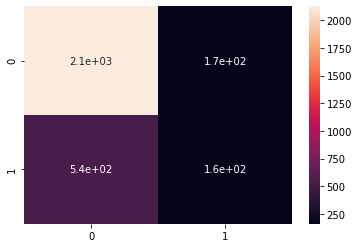

In [50]:
sns.heatmap(cf_matrix, annot= True)